In [1]:
# The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

<AxesSubplot:>

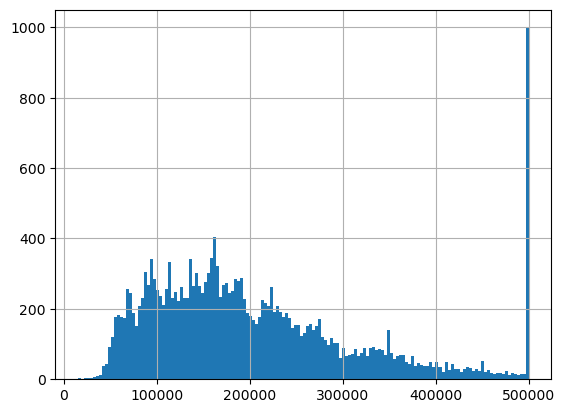

In [2]:
# EDA

df = pd.read_csv('../housing.csv')
df['median_house_value'].hist(bins=150)

In [3]:
# Preparing the dataset

df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
         'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [4]:
# Question 1

df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [5]:
# Question 2

df['population'].median()

1195.0

In [7]:
# Prepare and split the dataset

from sklearn.model_selection import train_test_split
SEED = 42

df = df.sample(frac=1, random_state=SEED)
X = df.drop(columns=['median_house_value'])
y = np.log1p(df['median_house_value'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=SEED)

In [8]:
# Linear Regression

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [9]:
# Question 3

# Option 1: fill with 0
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

# model_0 = LinearRegression()
# model_0.fit(X_train_0, y_train)
# y_pred_0 = model_0.predict(X_val_0)

w0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0_0 + X_val_0.dot(w_0)

score_0 = mean_squared_error(y_val, y_pred_0, squared=False) # RMSE

# Option 2: fill with mean

X_train_mean = X_train.fillna(X_train.mean())
X_val_mean = X_val.fillna(X_train.mean())

# model_mean = LinearRegression()
# model_mean.fit(X_train_mean, y_train)
# y_pred_mean = model_mean.predict(X_val_mean)

w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w_0_mean + X_val_mean.dot(w_mean)

score_mean = mean_squared_error(y_val, y_pred_mean, squared=False) # RMSE

print(f'RMSE of option 1 zero \nValidation: {round(score_0, 2)}')
print(f'RMSE of option 2 mean: \nValidation: {round(score_mean, 2)}')

RMSE of option 1 zero 
Validation: 0.34
RMSE of option 2 mean: 
Validation: 0.34


In [10]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [12]:
# Question 4

# from sklearn.linear_model import Ridge

X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

scores = []
best_score = None
best_r = None
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for i in r:
    
    # model = Ridge(alpha=i)
    # model.fit(X_train_0, y_train)
    # y_pred = model.predict(X_val_0)
    
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=i)
    y_pred = w0 + X_val_0.dot(w)
    
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores.append(round(score, 2))
    
    if best_score is None or score < best_score:
        best_score = score
        best_r = i
        
    if best_score == score:
        best_r = min(best_r, i)
        
    print(f'r: {i}\nVal RMSE: {round(score, 5)}\n')
        
print(f'Best r: {best_r}\nBest score: {round(best_score, 2)}')

r: 0
Val RMSE: 0.33828

r: 1e-06
Val RMSE: 0.33828

r: 0.0001
Val RMSE: 0.33828

r: 0.001
Val RMSE: 0.33828

r: 0.01
Val RMSE: 0.33827

r: 0.1
Val RMSE: 0.33841

r: 1
Val RMSE: 0.34136

r: 5
Val RMSE: 0.34403

r: 10
Val RMSE: 0.34458

Best r: 0.01
Best score: 0.34


In [13]:
# Question 5

seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for i in seed_list:
        
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=i)
        X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=i)
        
        X_train_0 = X_train.fillna(0)
        X_val_0 = X_val.fillna(0)
        
        # model = LinearRegression()
        # model.fit(X_train_0, y_train)
        # y_pred = model.predict(X_val_0)
        
        w0, w = train_linear_regression(X_train_0, y_train)
        y_pred = w0 + X_val_0.dot(w)
        
        score = mean_squared_error(y_val, y_pred, squared=False)
        scores.append(round(score, 2))
        
        print(f'Seed: {i}\nVal RMSE: {round(score, 5)}\n')
        
std = np.std(scores)
print(f'Standard deviation: {round(std, 3)}')

Seed: 0
Val RMSE: 0.33469

Seed: 1
Val RMSE: 0.33989

Seed: 2
Val RMSE: 0.3341

Seed: 3
Val RMSE: 0.33643

Seed: 4
Val RMSE: 0.3342

Seed: 5
Val RMSE: 0.33241

Seed: 6
Val RMSE: 0.33908

Seed: 7
Val RMSE: 0.33247

Seed: 8
Val RMSE: 0.33493

Seed: 9
Val RMSE: 0.34903

Standard deviation: 0.007


In [14]:
# Question 6

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=9)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=9)

X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

X_train_0 = X_train.fillna(0)
X_test_0 = X_test.fillna(0)

# model = Ridge(alpha=0.001)
# model.fit(X_train_0, y_train)
# y_pred = model.predict(X_test_0)

w0, w = train_linear_regression_reg(X_train_0, y_train, r=0.001)
y_pred = w0 + X_test_0.dot(w)

score = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test RMSE: {round(score, 2)}')

Test RMSE: 0.33
